# Lambda_b Reconstruction

Using the updated repo, simple starter file, and analysis template, add the 4-vectors of the proton, kaon, and two muons, and see if it gives the mass of the Lambda_b

$$\Lambda_b^0 \rightarrow J/\psi  K^-  p$$

$$\Lambda_b^0 \rightarrow \mu^+ \mu^- K^- p$$

$\Lambda_b^0$ - is a hadron, but more specifically a baryon
* Mass = 5.620 GeV
* Composition = up + down + bottom quark

$J/\psi$ - J/psi meson or psion
* Mass = 3.096 GeV
* Composition = charm + anti-charm quark
* Decays into $\mu^+$ and $\mu^-$
    * $\mu^-$ is a pion or pi meson
        * Mass = 0.105658 GeV
        * Composition = down + anti-up quark
    * $\mu^+$ is an antimuon
        * Mass = 0.105658 GeV
        * Composition = up + anti-down quark


$K^-$ is the anti-particle of the Kaon or K Meson
* Mass = 0.494 GeV
* Composition = anti-up + strange quark

$p$ is a hadron, but more specifically a baryon composed of three quarks
* Mass = 0.93827 GeV
* Composition = 2 up + 1 down quark

In [2]:
import lhcb_tools as lhcb

import numpy as np
import matplotlib.pylab as plt
%matplotlib notebook

/Applications/anaconda/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [3]:
from math import sqrt
def mass(E,px,py,pz):
    m1 = (E**2-(px**2+py**2+pz**2))
    if m1>=0:
        return sqrt(m1)
    else:
        return sqrt(-m1)

collision count:  0
collision count:  1000


<IPython.core.display.Javascript object>


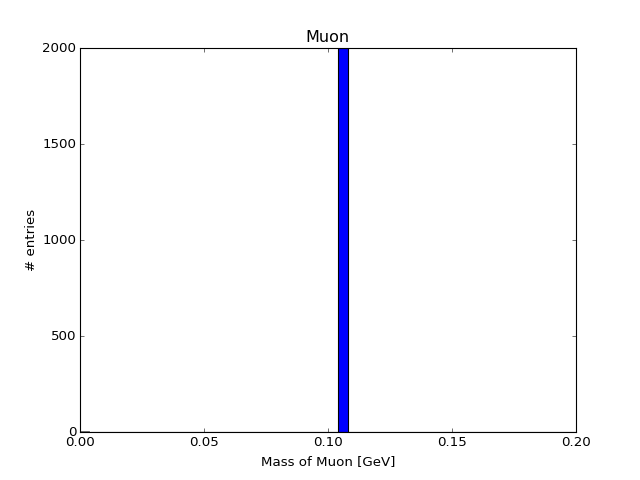

<IPython.core.display.Javascript object>


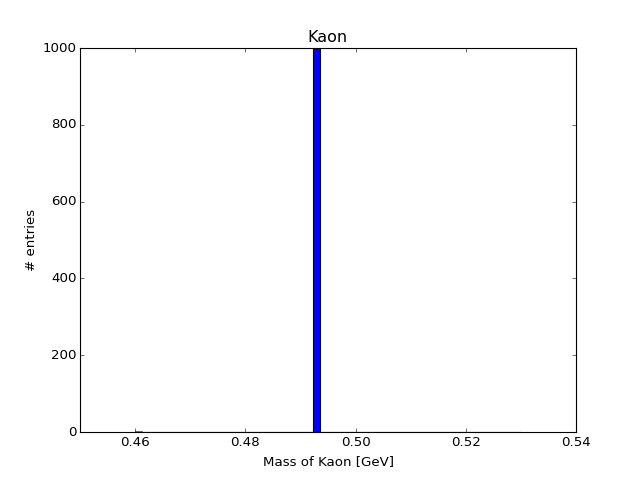

<IPython.core.display.Javascript object>


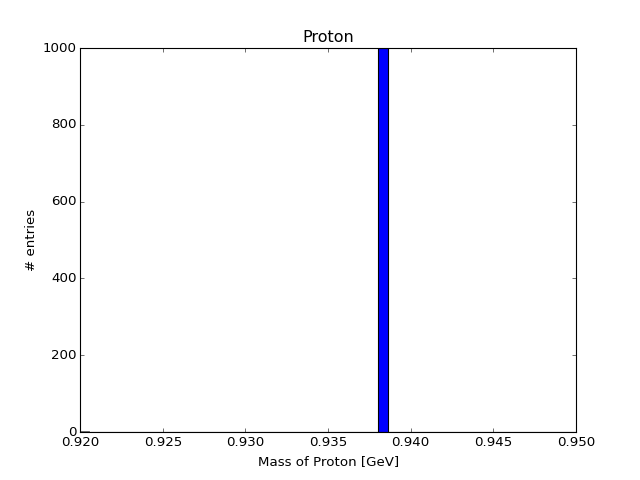

<IPython.core.display.Javascript object>


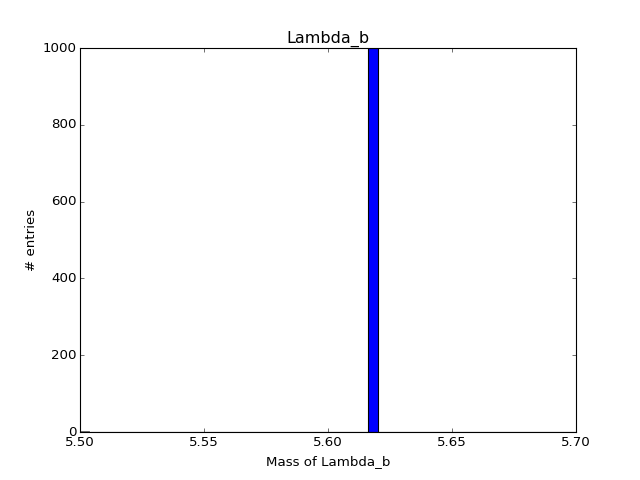

In [24]:
infile = open("ToyMC_LHCb_BtoJpsiKp_1k.dat",'r')

collisions = lhcb.get_collisions(infile,True)

nmuons = []
muon_mass = []

nkaons = []
kaons_mass = []

nprotons = []
proton_mass = []

lambda_b_mass = []

for collision in collisions:

    pions,kaons,protons,muons,electrons,photons = collision
    
    nmuon = len(muons)
    nmuons.append(nmuon)
    #print nmuon
    
    nkaon = len(kaons)
    nkaons.append(nkaon)
    
    nproton = len(protons)
    nprotons.append(nproton)
    
    
# Nmuon is always going to be 2 because we are looking at a lambda_b decay which has a j/psi 
# J/psi decays into muon and antimuon
    
    for muon in muons: # Mass of one muon  
        E,px,py,pz,q = muon
        m1 = mass(E,px,py,pz)
        muon_mass.append(m1)
        
    for kaon in kaons:
        E,px,py,pz,q = kaon
        m2 = mass(E,px,py,pz)
        kaons_mass.append(m2)
        
    for proton in protons:
        E,px,py,pz,q = proton
        m3 = mass(E,px,py,pz)
        proton_mass.append(m3)
        
    for i in range(0,nmuon):
        for j in range(i+1,nmuon):
            for k in range(0,nkaon):
                for l in range(0,nproton):
                    
                    E0,px0,py0,pz0,charge0=muons[i]
                    E1,px1,py1,pz1,charge1=muons[j]
                    E2,px2,py2,pz2,charge2=kaons[k]                    
                    E3,px3,py3,pz3,charge3=protons[l]
                
                    if charge0 == -charge1 and charge2 == -1 and charge3 == 1:
                        E = E0 + E1 + E2 + E3
                        px = px0 + px1 + px2 + px3 
                        py = py0 + py1 + py2 + py3
                        pz = pz0 + pz1 + pz2 + pz3
                        m = mass(E,px,py,pz)
                        lambda_b_mass.append(m)
                    
        
plt.figure()
plt.hist(muon_mass,bins=50,range=(0,0.2))
plt.xlabel('Mass of Muon [GeV]')
plt.ylabel('# entries')
plt.title('Muon')

plt.figure()
plt.hist(kaons_mass,bins=50,range=(0.46,0.53))
plt.xlabel('Mass of Kaon [GeV]')
plt.ylabel('# entries')
plt.title('Kaon')

plt.figure()
plt.hist(proton_mass,bins=50,range=(0.92,0.95))
plt.xlabel('Mass of Proton [GeV]')
plt.ylabel('# entries')
plt.title('Proton')

plt.figure()
plt.hist(lambda_b_mass,bins=50,range=(5.5,5.7))
plt.xlabel('Mass of Lambda_b')
plt.ylabel('# entries')
plt.title('Lambda_b')